<a href="https://colab.research.google.com/github/marcinwolter/Tracking_student2020/blob/master/Fit_with_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-07-15 19:48:38--  https://raw.githubusercontent.com/marcinwolter/Tracking_student2020/master/cooltemp.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118 [text/plain]
Saving to: ‘cooltemp.dat’

cooltemp.dat        100%[===================>]     118  --.-KB/s    in 0s      

2020-07-15 19:48:39 (8.00 MB/s) - ‘cooltemp.dat’ saved [118/118]

 0 0 0 0.75
 1 0.5 0 .25
 2 2.1 0 .25
 3 3.7 0 0.5
 4 4.2 0 0.75
 5 4.6 0 .25
 7 7.1 0 .5
 3.5 9.5 0 0.1
 6 6.6 0 0.1
yerr =  [0.75 0.25 0.25 0.5  0.75 0.25 0.5  0.1  0.1 ]
Fit with f(x)=ax+b
a= 0.4406291636792596 +/- 0.03811474117350938
b= 4.931930261341598 +/- 0.17649310174393795


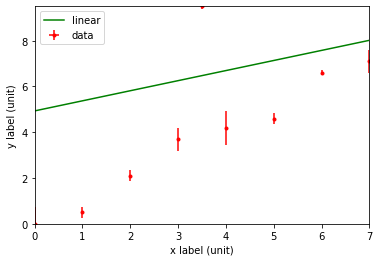

 
chisq = 1797.8380081851692 ndf = 7
chisq/ndf = 256.8340011693099


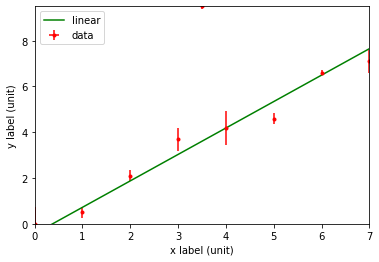

In [12]:
import numpy as np
from numpy import *
import pylab
from scipy.optimize import curve_fit, least_squares
from scipy import stats

# get data
! rm -fr cooltemp.da*
! wget https://raw.githubusercontent.com/marcinwolter/Tracking_student2020/master/cooltemp.dat
! cat cooltemp.dat
fn = 'cooltemp.dat'
x, y, xerr, yerr = loadtxt(fn,unpack=True, usecols=[0,1,2,3])
yerr *= 1.
print("yerr = ",yerr)


## FIT ##
print('Fit with f(x)=ax+b')
def fit(x,a,b): 
     return a*x+b



popt,pcov=curve_fit(fit,x,y,p0=(0.0,0.0),sigma=yerr, absolute_sigma=True) 
#The argument absolute_sigma=True is necessary. It says the values in sig are all literally the standard deviations and not 
#just relative weights for the data points. With this option the resulting chi square can be used to determine goodness of fit.

a=popt[0]; err_a=np.sqrt(pcov[0,0])
b=popt[1]; err_b=np.sqrt(pcov[1,1])
print('a=',a,"+/-",err_a)
print('b=',b,"+/-",err_b)

def chi2(x,y,yerr,fit):
  # Now calculate chi square 
  yexp = fit(x, *popt)
  r = (y - yexp)/yerr
  chisq = np.sum(r**2)
  df = len(x) - 2
  return chisq, df, r

chisq, df, r = chi2(x,y,yerr,fit)

# show results
pn = poly1d(popt)

# plot data and fit
xx = linspace(0, max(x), 500)
pylab.plot(xx, pn(xx),'-g')
pylab.errorbar(x, y, yerr, xerr, fmt='r.')

# customise graph
pylab.legend(['linear','data'])
pylab.axis([0,max(x),0,max(y)])
pylab.xlabel('x label (unit)')
pylab.ylabel('y label (unit)')

pylab.show()


# Hand-made robust fit - drop one single outlier
# check chiqq/ndf
chisq_limit = 4. # this is an arbitrary parameter, should be tuned
if chisq/df>chisq_limit:

    # Find outlier and remove it
    # find point with the highest abs(r)
    ii = np.where(r == np.amax(abs(r)))[0]
    #ii = ii[0] 
    x_robust = np.delete(x,ii)
    y_robust = np.delete(y,ii)
    yerr_robust = np.delete(yerr,ii)
    # repeat fit without outlier
    popt,pcov=curve_fit(fit,x_robust,y_robust,p0=(0.0,0.0),sigma=yerr_robust, absolute_sigma=True)

print(" ")
print("chisq =",chisq,"ndf =",df)
print("chisq/ndf =",chisq/df)

pn = poly1d(popt)

# plot data and fit
xx = linspace(0, max(x), 500)
pylab.plot(xx, pn(xx),'-g')
pylab.errorbar(x, y, yerr, xerr, fmt='r.')

# customise graph
pylab.legend(['linear','data'])
pylab.axis([0,max(x),0,max(y)])
pylab.xlabel('x label (unit)')
pylab.ylabel('y label (unit)')

pylab.show()